### Project - MovieLens Data Analysis

The GroupLens Research Project is a research group in the Department of Computer Science and Engineering at the University of Minnesota. The data is widely used for collaborative filtering and other filtering solutions. However, we will be using this data to act as a means to demonstrate our skill in using Python to “play” with data.

#### Domain 
Internet and Entertainment

**Note that the project will need you to apply the concepts of groupby and merging extensively.**

In [1]:
import warnings
warnings.filterwarnings('ignore')

#### 1. Import the necessary packages - 2.5 marks

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# To enable plotting graphs in Jupyter notebook
%matplotlib inline
import seaborn as sns

#### 2. Read the 3 datasets into dataframes - 2.5 marks

In [3]:
# Load the data, item and user into pandas dataframes
data_df = pd.read_csv("Data.csv")
item_df = pd.read_csv("item.csv")
user_df = pd.read_csv("user.csv")

#### 3. Apply info, shape, describe, and find the number of missing values in the data - 5 marks

In [4]:
#print the info, shape and describe for each data frame 
print('Data dataframe info \n')
print(data_df.info())
print('\nData dataframe shape \n')
print(data_df.shape)
print('\nData dataframe describe \n')
print(data_df.describe())

print('\nItem dataframe info \n')
print(item_df.info())
print('\nItem dataframe shape \n')
print(item_df.shape)
print('\nItem dataframe describe \n')
print(item_df.describe())

print('\nUser dataframe info \n')
print(user_df.info())
print('\nUser dataframe shape \n')
print(user_df.shape)
print('\nUser dataframe describe \n')
print(user_df.describe())


Data dataframe info 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   user id    100000 non-null  int64
 1   movie id   100000 non-null  int64
 2   rating     100000 non-null  int64
 3   timestamp  100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB
None

Data dataframe shape 

(100000, 4)

Data dataframe describe 

            user id       movie id         rating     timestamp
count  100000.00000  100000.000000  100000.000000  1.000000e+05
mean      462.48475     425.530130       3.529860  8.835289e+08
std       266.61442     330.798356       1.125674  5.343856e+06
min         1.00000       1.000000       1.000000  8.747247e+08
25%       254.00000     175.000000       3.000000  8.794487e+08
50%       447.00000     322.000000       4.000000  8.828269e+08
75%       682.00000     631.000000       4.000000  8.882600e+08
max       943.000

In [5]:
# number of missing values in all data frames
# the info from each data frame shows no missing data
print('Number of missing value(s) in the data is: ' + 
      str(data_df.isnull().sum().sum() + item_df.isnull().sum().sum() + user_df.isnull().sum().sum()))

Number of missing value(s) in the data is: 0


#### 4. Find the number of movies per genre using the item data - 5 marks

In [6]:
# use sum on the default axis
#print('Number of movies per genre:')
item_df.iloc[:,3:].sum()

unknown          1
Action         251
Adventure      135
Animation       42
Childrens      122
Comedy         505
Crime          109
Documentary     50
Drama          725
Fantasy         22
Film-Noir       24
Horror          92
Musical         56
Mystery         61
Romance        247
Sci-Fi         101
Thriller       251
War             71
Western         27
dtype: int64

#### 5. Find the movies that have more than one genre - 2.5 marks

In [7]:
#hint: use sum on the axis = 1
item_df[item_df.iloc[:,3:].sum(axis=1) > 1] ['movie title']

0               Toy Story 
1               GoldenEye 
3              Get Shorty 
4                 Copycat 
6          Twelve Monkeys 
               ...        
1667    MURDER and murder 
1668              Tainted 
1671               Mirage 
1677            B. Monkey 
1678        Sliding Doors 
Name: movie title, Length: 849, dtype: object

#### 6. Drop the movie where the genre is unknown - 2.5 marks

In [8]:
#item_df[item_df['unknown'] == 1].index
item_df.drop(item_df[item_df['unknown'] == 1].index, inplace = True) 


### 7. Univariate plots of columns: 'rating', 'Age', 'release year', 'Gender' and 'Occupation' - 10 marks

In [ ]:
# HINT: use distplot for age and countplot for gender,ratings,occupation.
# HINT: Please refer to the below snippet to understand how to get to release year from release date. You can use str.split()
# as depicted below
# Hint : Use displot without kde for release year or line plot showing year wise count.

In [ ]:
a = 'My*cat*is*brown'
print(a.split('*')[3])

#similarly, the release year needs to be taken out from release date

#also you can simply slice existing string to get the desired data, if we want to take out the colour of the cat

print(a[10:])
print(a[-5:])

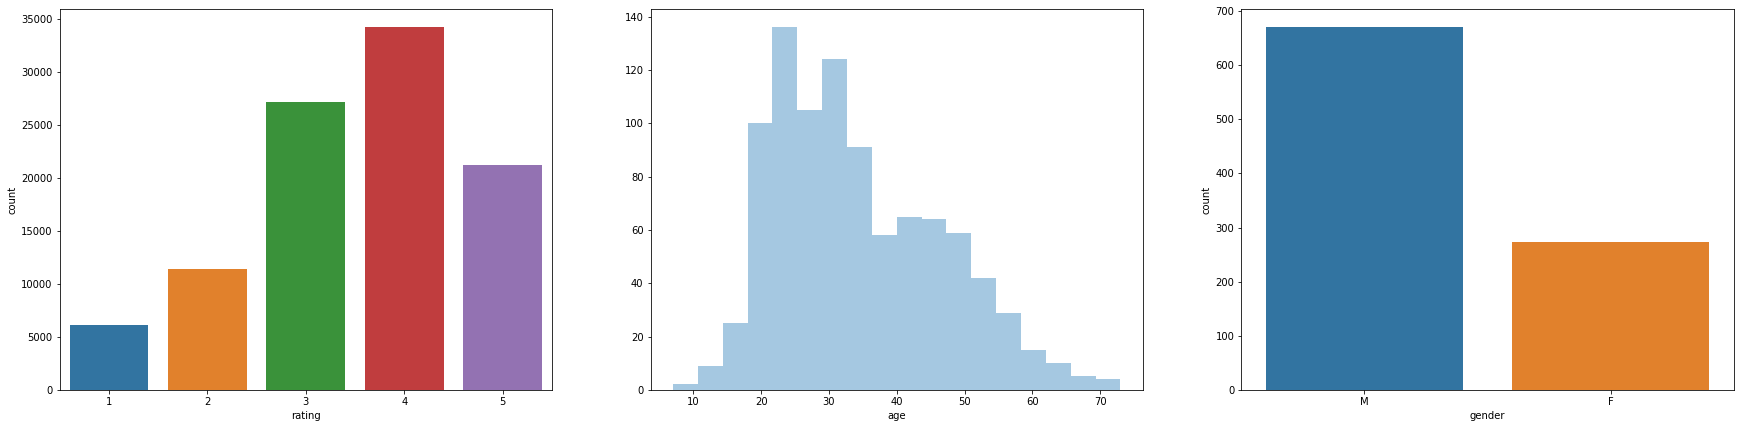

In [9]:
#your answers here
fig, axs = plt.subplots(ncols = 3, figsize = (30, 7))

sns.countplot(data_df['rating'], ax = axs[0])
sns.distplot(user_df['age'], ax = axs[1], kde=False, )
sns.countplot(user_df['gender'], ax = axs[2])

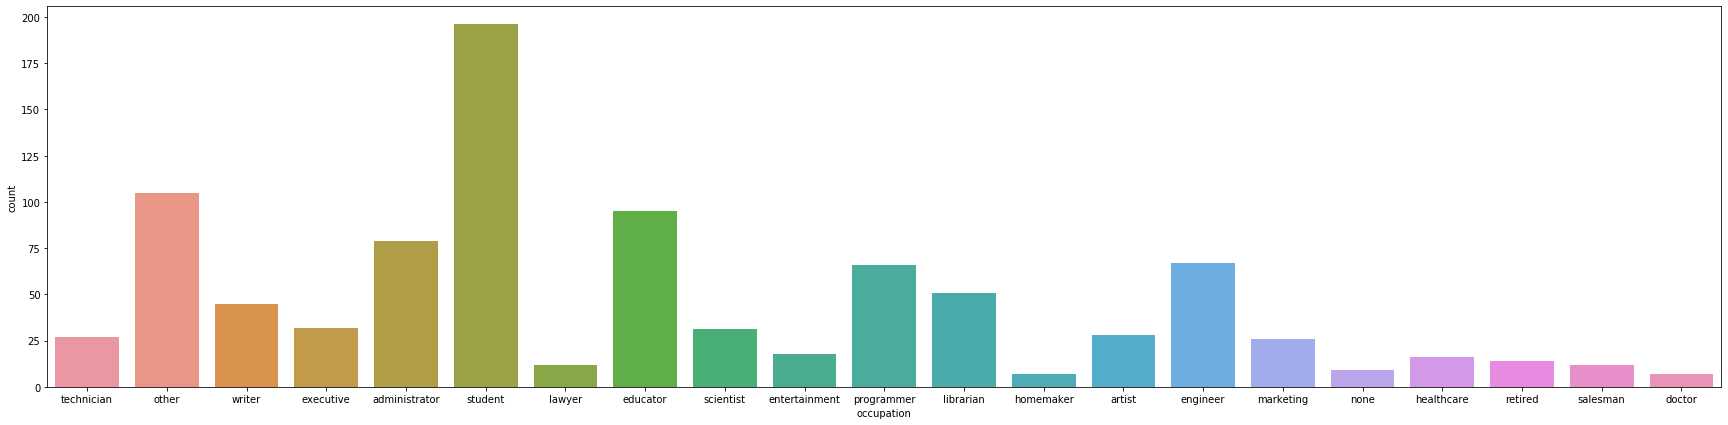

In [10]:
fig2, axs2 = plt.subplots(ncols = 1, figsize = (30, 7))
sns.countplot(user_df['occupation'])

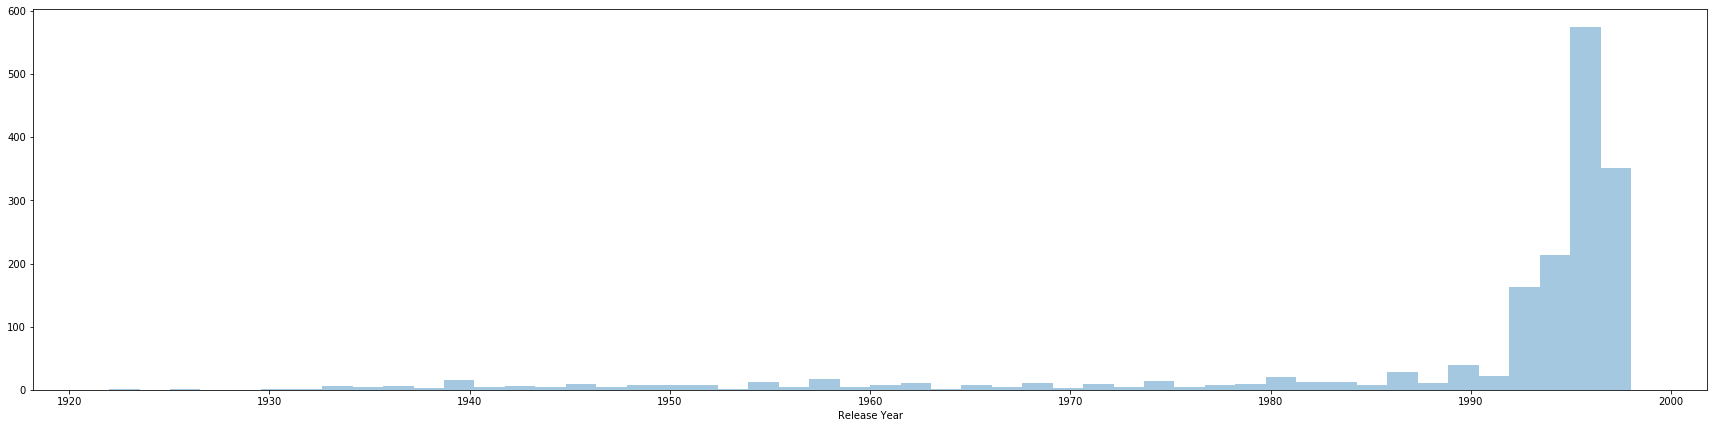

In [11]:
fig3, axs3 = plt.subplots(ncols = 1, figsize = (30, 7))
sns.distplot(item_df['release date'].str.split('-', expand=True)[2], kde=False, axlabel='Release Year')

### 8. Visualize how popularity of genres has changed over the years - 10 marks

Note that you need to use the number of releases in a year as a parameter of popularity of a genre

Hint 

1: you need to reach to a data frame where the release year is the index and the genre is the column names (one cell shows the number of release in a year in one genre) or vice versa.
Once that is achieved, you can either use univariate plots or can use the heatmap to visualise all the changes over the years 
in one go. 

Hint 2: Use groupby on the relevant column and use sum() on the same to find out the nuumber of releases in a year/genre.  

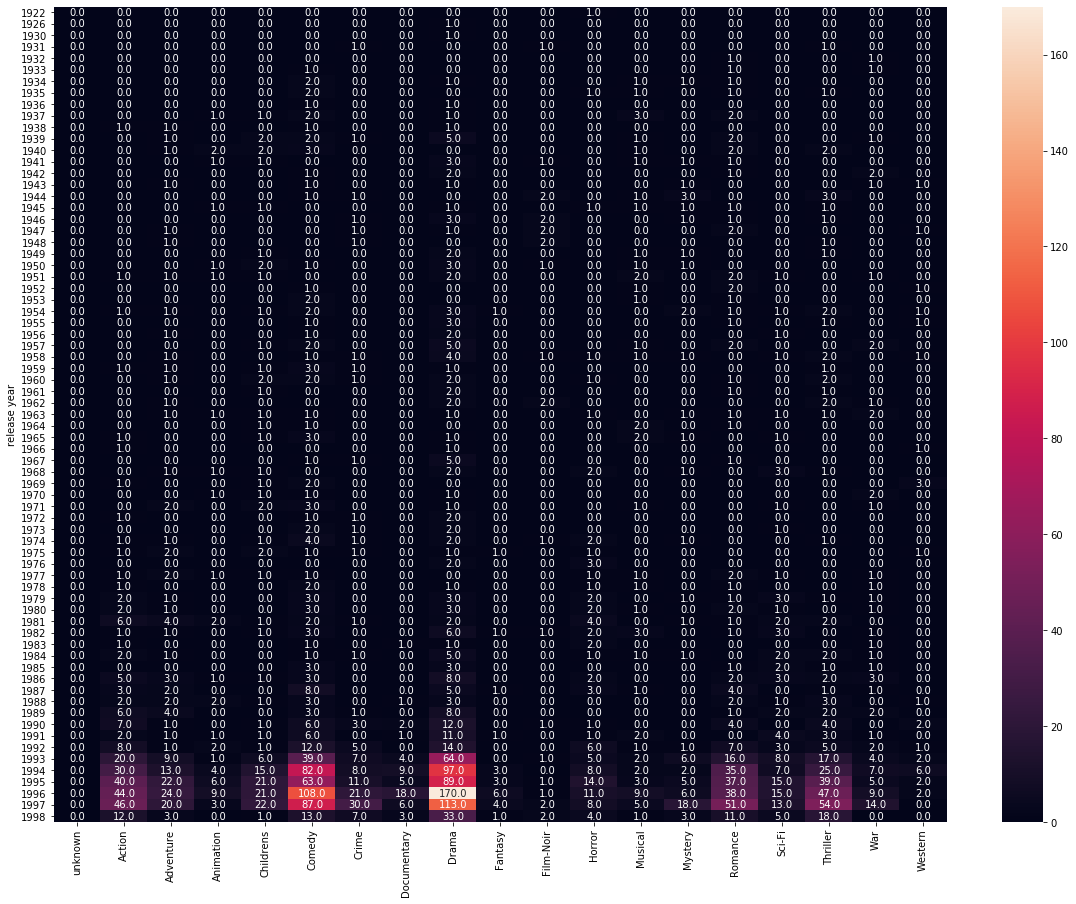

In [12]:
#Your answer here
plt.figure(figsize=(20,15))
item_df['release year'] = item_df['release date'].str.split('-', expand=True)[2]
#item_df.groupby('release year').sum()
sns.heatmap(item_df.iloc[:,3:].groupby('release year').sum(), annot=True, fmt= '.1f')
plt.show()

### Response to Question 8: It would seem like data for 1998 is not complete. 
I can deduce from the heatmap that Drama and Comedy has become more popular genres begining from 1992 while to a lesser degree Action, Romance and Thriller have also become popular beginning from 1993. 

There doesn't seem to be any significant changes in Animation, Fantasy, Film-Noir, Western


### 9. Find the top 25 movies according to average ratings such that each movie has number of ratings more than 100 - 10 marks

Hint : 
1. First find the movies that have more than 100 ratings(use merge, groupby and count). Extract the movie titles in a list.
2. Find the average rating of all the movies and sort them in the descending order. You will have to use the .merge() function to reach to a data set through which you can get the names and the average rating.
3. Use isin(list obtained from 1) to filter out the movies which have more than 100 ratings.

Note: This question will need you to research about groupby and apply your findings. You can find more on groupby on https://realpython.com/pandas-groupby/.

In [13]:
#your answer here
movieTitle_df = item_df[['movie id', 'movie title']]
moviesOver100_df = pd.merge(data_df,movieTitle_df,how='outer',on='movie id')
moviesOver100_df = moviesOver100_df.groupby(['movie id', 'movie title']).size().reset_index(name='counts').sort_values(by=['counts'], ascending=False)
moviesOver100_df = moviesOver100_df[(moviesOver100_df['counts'] > 100)]

topMovies_df = pd.merge(moviesOver100_df, data_df, how='inner', on='movie id')[['movie title', 'movie id', 'rating', 'counts']] 
topMovies_df = topMovies_df.groupby(['movie id', 'movie title', 'counts']).mean().sort_values(by=['rating'], ascending=False)
topMovies_df.head(25).reset_index()


,movie id,movie title,counts,rating
0,408,"Close Shave, A",112,4.491071
1,318,Schindler's List,298,4.466443
2,169,"Wrong Trousers, The",118,4.466102
3,483,Casablanca,243,4.456790
4,64,"Shawshank Redemption, The",283,4.445230
5,603,Rear Window,209,4.387560
6,12,"Usual Suspects, The",267,4.385768
7,50,Star Wars,583,4.358491
8,178,12 Angry Men,125,4.344000
9,134,Citizen Kane,198,4.292929


### 10. See gender distribution across different genres check for the validity of the below statements - 10 marks

* Men watch more drama than women
* Women watch more Sci-Fi than men
* Men watch more Romance than women


1. There is no need to conduct statistical tests around this. Just compare the percentages and comment on the validity of the above statements.

2. you might want ot use the .sum(), .div() function here.
3. Use number of ratings to validate the numbers. For example, if out of 4000 ratings received by women, 3000 are for drama, we will assume that 75% of the women watch drama.

#### Conclusion:



In [14]:
all_df = pd.merge(data_df,user_df,how='inner',on='user id')
all_df = pd.merge(all_df,item_df,how='inner',on='movie id')

drama_df = all_df[(all_df['Drama'] == 1)][['rating', 'gender']]
scifi_df = all_df[(all_df['Sci-Fi'] == 1)][['rating', 'gender']]
romance_df = all_df[(all_df['Romance'] == 1)][['rating', 'gender']]

#print('Gender Rating Count Per ')
ratio_df = all_df[['user id', 'gender']].groupby(['gender']).count()
female_rating_count = ratio_df['user id']['F']
male_rating_count = ratio_df['user id']['M']
print('Total number of ratings by gender \n' + 
      '\nWomen : ' + str(female_rating_count) + 
      '\n  Men : ' + str(male_rating_count))

#Drama Ratings Ratio
print('\nDrama rating percentages\n')
print('Women: ' + str(drama_df.groupby(['gender']).count()['rating']['F'] / female_rating_count)
     +'\n  Men: ' + str(drama_df.groupby(['gender']).count()['rating']['M'] / male_rating_count))

print('\n\nSci-Fi rating percentages \n')
print('Women: ' + str(scifi_df.groupby(['gender']).count()['rating']['F'] / female_rating_count)
     +'\n  Men: ' + str(scifi_df.groupby(['gender']).count()['rating']['M'] / male_rating_count))

print('\n\nRomance rating percentages\n')
print('Women: ' + str(romance_df.groupby(['gender']).count()['rating']['F'] / female_rating_count)
     +'\n  Men: ' + str(romance_df.groupby(['gender']).count()['rating']['M'] / male_rating_count))


Total number of ratings by gender 

Women : 25738
  Men : 74252

Drama rating percentages

Women: 0.4276944595539669
  Men: 0.3890400258578893


Sci-Fi rating percentages 

Women: 0.10214468878700754
  Men: 0.13603673975111782


Romance rating percentages

Women: 0.22760121221540136
  Men: 0.18320045251306363


### Response to Question 10, based on percentages calculated as total ratings per category / total number of response for gender above

* Men watch more drama than women   -> False
* Women watch more Sci-Fi than men  -> False
* Men watch more Romance than women -> False 